# Concentrated Liquidity Market Maker Dominance

### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import urllib.request
pd.options.mode.chained_assignment = None

# Use Panoptic stylesheet - replace with where you saved it on your local directory
plt.style.use('[INSERT_DIRECTORY_HERE]/panoptic-dark-16_9.mplstyle')

### Download DEX TVL data from DeFiLlama

In [2]:
TVL = pd.read_csv("https://api.llama.fi/simpleChainDataset/All?category=Dexes&").T
TVL = TVL.set_axis(TVL.iloc[0], axis=1).iloc[1:]
TVL = TVL.sort_index(axis=1)
TVL

Protocol,0.exchange,01,10KSwap,1BCH,1Beam,1Swap,1inch Network,3xcalibur,4Swap,ABcDeFX,...,eckoDAO,iziSwap,ko.one,mySwap,onAVAX,sevenswap,xExchange,xSigma,zkEVMSwap,zkMoonSwap
03/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/04/2023,111861.652144,12112336.869164,2319281.926497,10325.051785,3089.140892,20605.25115,7135470.282354,7260861.68494,65918354.3018,16525.35826,...,1585815.161471,22459830.610922,21763.37267,1641969.40707,67048.698015,0.481907,65727835.740737,353453.527006,2193.868744,123273.299706
12/04/2023,112998.219479,12809325.154984,2329378.56925,10474.868448,3091.05442,20528.499284,7073139.312625,7169805.404189,65826559.21842,16619.784964,...,1597785.52021,21538715.315468,21762.457369,1656030.182187,61913.057959,0.488341,65068105.702047,353688.395344,2044.719569,128753.476197
13/04/2023,113222.149933,12906620.89436,2343234.731542,10358.970402,3091.120345,20701.310089,7076616.972591,7323086.919844,65882080.51425,16543.325115,...,1591214.244615,22350089.882744,22060.368667,1733208.337964,61863.102087,0.484408,56276789.635107,353654.424823,2054.311937,127791.726594
14/04/2023,117717.694852,13188235.544004,2536246.609723,10783.910885,3097.909951,20643.580025,7509407.850274,7684553.40445,68067639.95656,16663.426197,...,1698920.892414,23530514.362115,23166.40673,1777446.370664,64944.774263,0.491257,56446514.832345,354483.805794,1358.569023,129370.67977


In [3]:
CLMMs = ['Uniswap V3', 'KyberSwap Elastic', 'Joe V2', 'PancakeSwap AMM V3', 'SushiSwap V3', 'Quickswap V3', 'Camelot V3']

TVL_CLMMs = TVL[CLMMs]
TVL_CLMMs['CLMM_total'] = TVL_CLMMs.sum(axis=1)
TVL_CLMMs

Protocol,Uniswap V3,KyberSwap Elastic,Joe V2,PancakeSwap AMM V3,SushiSwap V3,Quickswap V3,Camelot V3,CLMM_total
03/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
04/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
05/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
06/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
07/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
...,...,...,...,...,...,...,...,...
11/04/2023,2877434552.153715,105948834.007377,56491713.947853,190003597.656302,203417.394276,64121189.712061,614639.042162,3.294818e+09
12/04/2023,2841590150.961535,102577021.869738,55884031.882018,205363728.558126,204225.523959,63268597.523263,820806.718035,3.269709e+09
13/04/2023,2960313705.964303,103795552.790511,56304040.64614,213552114.770995,203656.059682,65171107.967779,1387397.937096,3.400728e+09
14/04/2023,3107300316.332813,108442218.289179,59164752.167711,222385659.472575,187570.593192,69703902.902028,1648183.191982,3.568833e+09


In [4]:
TVL_AMMs = TVL[TVL.columns.difference(CLMMs + ['Total'])]
TVL_AMMs['AMM_total'] = TVL_AMMs.sum(axis=1)
TVL_AMMs

Protocol,0.exchange,01,10KSwap,1BCH,1Beam,1Swap,1inch Network,3xcalibur,4Swap,ABcDeFX,...,iziSwap,ko.one,mySwap,onAVAX,sevenswap,xExchange,xSigma,zkEVMSwap,zkMoonSwap,AMM_total
03/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.464389e+04
04/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.126818e+04
05/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055178e+04
06/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.309134e+04
07/11/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.539794e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/04/2023,111861.652144,12112336.869164,2319281.926497,10325.051785,3089.140892,20605.25115,7135470.282354,7260861.68494,65918354.3018,16525.35826,...,22459830.610922,21763.37267,1641969.40707,67048.698015,0.481907,65727835.740737,353453.527006,2193.868744,123273.299706,1.555737e+10
12/04/2023,112998.219479,12809325.154984,2329378.56925,10474.868448,3091.05442,20528.499284,7073139.312625,7169805.404189,65826559.21842,16619.784964,...,21538715.315468,21762.457369,1656030.182187,61913.057959,0.488341,65068105.702047,353688.395344,2044.719569,128753.476197,1.548348e+10
13/04/2023,113222.149933,12906620.89436,2343234.731542,10358.970402,3091.120345,20701.310089,7076616.972591,7323086.919844,65882080.51425,16543.325115,...,22350089.882744,22060.368667,1733208.337964,61863.102087,0.484408,56276789.635107,353654.424823,2054.311937,127791.726594,1.550845e+10
14/04/2023,117717.694852,13188235.544004,2536246.609723,10783.910885,3097.909951,20643.580025,7509407.850274,7684553.40445,68067639.95656,16663.426197,...,23530514.362115,23166.40673,1777446.370664,64944.774263,0.491257,56446514.832345,354483.805794,1358.569023,129370.67977,1.614770e+10


<AxesSubplot:>

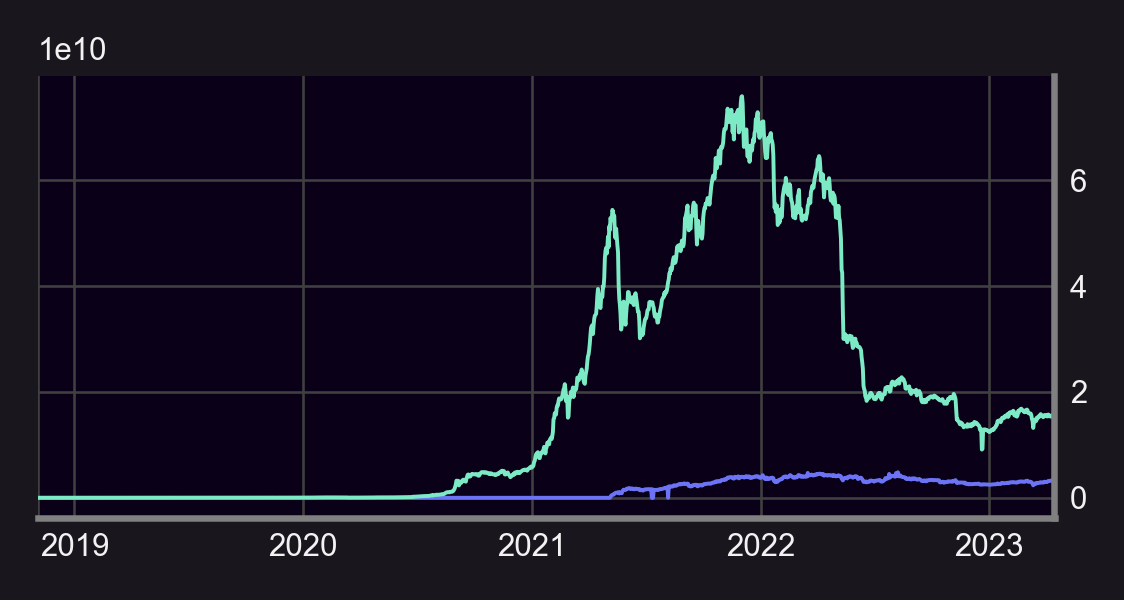

In [5]:
TVL.index = pd.to_datetime(TVL.index, format='%d/%m/%Y')
TVL_CLMMs.index = pd.to_datetime(TVL_CLMMs.index, format='%d/%m/%Y')
TVL_AMMs.index = pd.to_datetime(TVL_AMMs.index, format='%d/%m/%Y')

TVL_CLMMs['CLMM_total'].plot()
TVL_AMMs['AMM_total'].plot()

In [6]:
TVL_summary = TVL_CLMMs[['CLMM_total']]
TVL_summary['AMM_total'] = TVL_AMMs['AMM_total']
TVL_summary['Total'] = TVL['Total']
TVL_summary['% TVL in CLMMs'] = (TVL_summary['CLMM_total'] / TVL_summary['Total']) * 100
TVL_summary

Protocol,CLMM_total,AMM_total,Total,% TVL in CLMMs
2018-11-03,0.000000e+00,3.464389e+04,34643.89061,0.0
2018-11-04,0.000000e+00,4.126818e+04,41268.183107,0.0
2018-11-05,0.000000e+00,4.055178e+04,40551.782624,0.0
2018-11-06,0.000000e+00,4.309134e+04,43091.340148,0.0
2018-11-07,0.000000e+00,1.539794e+05,153979.388674,0.0
...,...,...,...,...
2023-04-11,3.294818e+09,1.555737e+10,18852188972.071373,17.477111
2023-04-12,3.269709e+09,1.548348e+10,18753184231.179462,17.435485
2023-04-13,3.400728e+09,1.550845e+10,18909182392.689262,17.98453
2023-04-14,3.568833e+09,1.614770e+10,19716531485.894669,18.100712


Text(0.5, 1.0, 'CLMM TVL dominance')

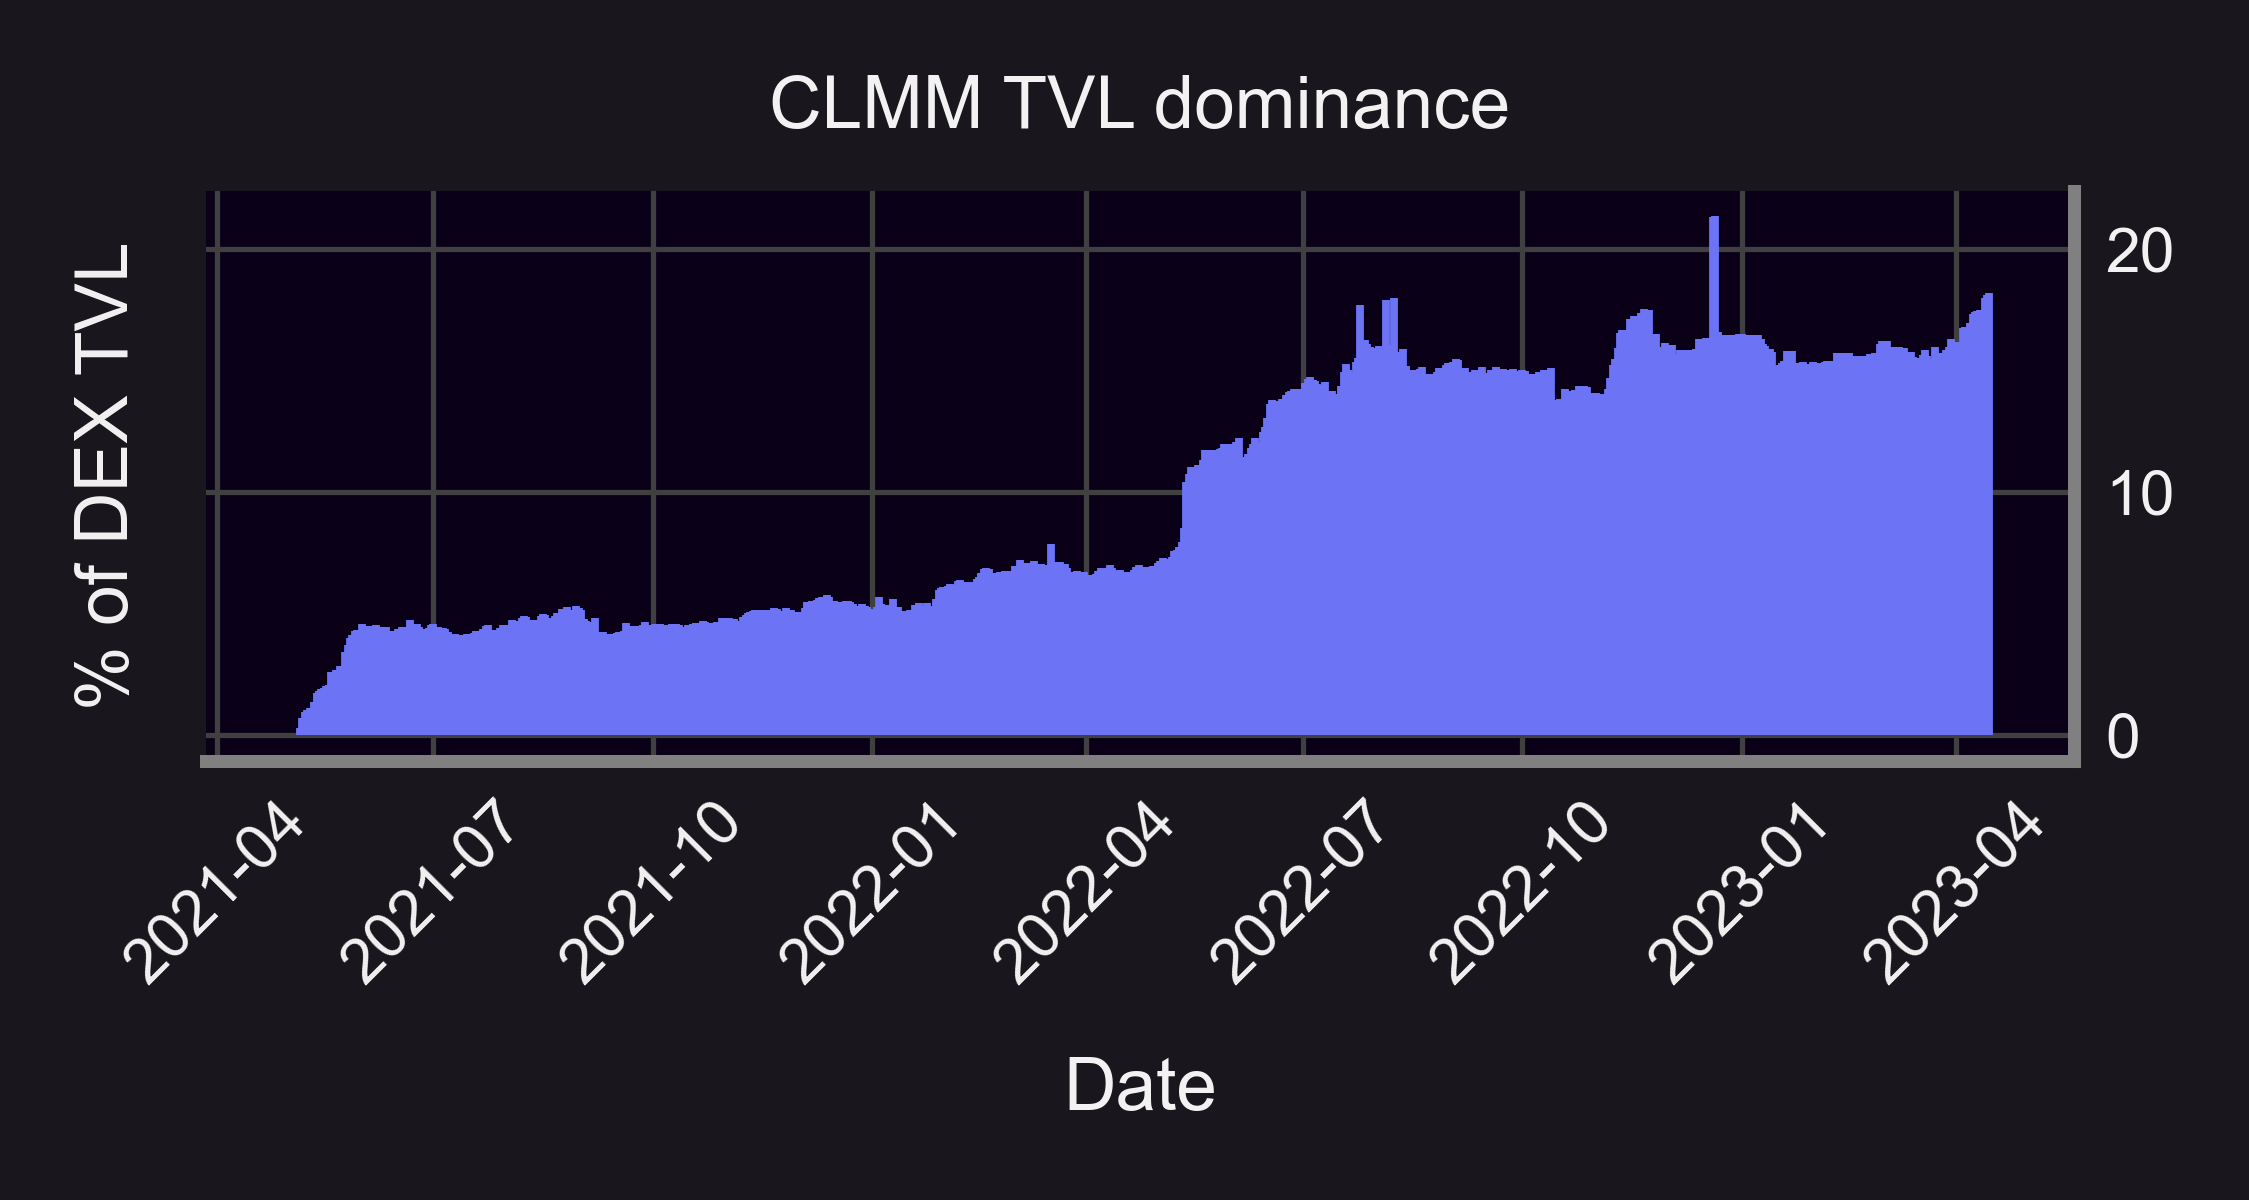

In [7]:
temp = TVL_summary['% TVL in CLMMs'].loc[TVL_summary['% TVL in CLMMs'].index > '2021-05-01']

plt.figure(dpi=750)

plt.stem(temp.index, temp, linefmt='-', markerfmt=' ', basefmt=' ')

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('% of DEX TVL')
plt.title('CLMM TVL dominance')

### Download DEX Volume data from DeFiLlama

In [8]:
url = "https://api.llama.fi/overview/dexs?excludeTotalDataChart=true&excludeTotalDataChartBreakdown=true&dataType=dailyVolume"

with urllib.request.urlopen(url) as url:
    protocols = json.loads(url.read().decode())['protocols']
    
    total24h = {protocol['name']: protocol['total24h'] if protocol['total24h'] else 0 for protocol in protocols}
    total7d = {protocol['name']: protocol['total7d'] if protocol['total7d'] else 0 for protocol in protocols}
    total14dto7d = {protocol['name']: protocol['total14dto7d'] if protocol['total14dto7d'] else 0 for protocol in protocols}
    total30d = {protocol['name']: protocol['total30d'] if protocol['total30d'] else 0 for protocol in protocols}
    total60dto30d = {protocol['name']: protocol['total60dto30d'] if protocol['total60dto30d'] else 0 for protocol in protocols}

stats = [total24h, total7d, total14dto7d, total30d, total60dto30d]

In [9]:
total24h_CLMM = {k: v for k, v in total24h.items() if k in CLMMs}
total7d_CLMM = {k: v for k, v in total7d.items() if k in CLMMs}
total14dto7d_CLMM = {k: v for k, v in total14dto7d.items() if k in CLMMs}
total30d_CLMM = {k: v for k, v in total30d.items() if k in CLMMs}
total60dto30d_CLMM = {k: v for k, v in total60dto30d.items() if k in CLMMs}

In [10]:
total24h_frac = (sum(total24h_CLMM.values()) / sum(total24h.values())) * 100
total7d_frac = (sum(total7d_CLMM.values()) / sum(total7d.values())) * 100
total14dto7d_frac = (sum(total14dto7d_CLMM.values()) / sum(total14dto7d.values())) * 100
total30d_frac = (sum(total30d_CLMM.values()) / sum(total30d.values())) * 100
total60dto30d_frac = (sum(total60dto30d_CLMM.values()) / sum(total60dto30d.values())) * 100

In [11]:
print(total24h_frac, total7d_frac, total14dto7d_frac, total30d_frac, total60dto30d_frac)

65.31920059233036 57.540620687511634 56.58352080252208 55.58540552794178 53.86665703339144


In [12]:
print(f"Out of the ${round(sum(total30d.values()) / 1e9)} bn traded on DEXs last month, ${round(sum(total30d_CLMM.values()) / 1e9)} bn was on CLMMs ({round(total30d_frac)}%)!")

Out of the $83 bn traded on DEXs last month, $46 bn was on CLMMs (56%)!
